In [1]:
import pandas as pd
from sklearn.datasets import load_boston#データセット
data = load_boston()
df = pd.DataFrame(data["data"], columns = data["feature_names"])
df["target"] = data["target"]
print(df.shape)
df.head()

(506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
from sklearn.model_selection import KFold#データ分割
kf = KFold(n_splits = 5, shuffle = True)
df["fold"] = -1
for fold, (train_idx, valid_idx) in enumerate(kf.split(df)):
    df.loc[valid_idx, "fold"] = fold
print(df["fold"].value_counts())

0    102
4    101
3    101
2    101
1    101
Name: fold, dtype: int64


In [3]:
fold = 0
train = df.loc[df["fold"] != fold].copy()
valid = df.loc[df["fold"] == fold].copy()
print(train.shape, valid.shape)

(404, 15) (102, 15)


In [4]:
feat_cols = train.drop(columns = ["fold", "target"]).columns.tolist()
print(feat_cols)
#予測に用いる特徴量
X_train = train[feat_cols]
X_valid = valid[feat_cols]
#予測する目的変数
y_train = train["target"]
y_valid = valid["target"]

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [5]:
import xgboost as xgb

In [7]:
#データ形式変換
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_valid, y_valid)

In [8]:
#パラメータを辞書型データで設定
params = {
    "objective" : "reg:squarederror",
    "eval_metric" : "rmse"
}

In [9]:
#学習の実行
model = xgb.train(
    params = params,
    dtrain = dtrain,
    evals = [(dtrain, "train"), (dvalid, "valid")],
    num_boost_round = 100
)

[0]	train-rmse:16.9639	valid-rmse:17.7267
[1]	train-rmse:12.2371	valid-rmse:12.8148
[2]	train-rmse:8.92077	valid-rmse:9.48638
[3]	train-rmse:6.58932	valid-rmse:7.25608
[4]	train-rmse:4.93329	valid-rmse:5.82809
[5]	train-rmse:3.77386	valid-rmse:4.73814
[6]	train-rmse:2.96782	valid-rmse:4.12599
[7]	train-rmse:2.39062	valid-rmse:3.668
[8]	train-rmse:1.98896	valid-rmse:3.43602
[9]	train-rmse:1.7032	valid-rmse:3.26636
[10]	train-rmse:1.49486	valid-rmse:3.1739
[11]	train-rmse:1.35599	valid-rmse:3.11248
[12]	train-rmse:1.23939	valid-rmse:3.07794
[13]	train-rmse:1.17187	valid-rmse:3.05689
[14]	train-rmse:1.11787	valid-rmse:3.03585
[15]	train-rmse:1.06903	valid-rmse:3.00703
[16]	train-rmse:1.02203	valid-rmse:3.01016
[17]	train-rmse:0.956745	valid-rmse:2.99286
[18]	train-rmse:0.895796	valid-rmse:2.98393
[19]	train-rmse:0.831305	valid-rmse:2.97763
[20]	train-rmse:0.801838	valid-rmse:2.97487
[21]	train-rmse:0.738663	valid-rmse:2.98086
[22]	train-rmse:0.71553	valid-rmse:2.97854
[23]	train-rmse:0.68

In [10]:
#予測結果の出力
pred = model.predict(xgb.DMatrix(X_valid))
print(pred)

[35.37047   21.918264  18.709919  19.705776  21.322565  23.7552
 17.600515  14.293122  15.70263   14.361754  12.760307  14.8420315
 20.836025  21.025524  19.22685   23.38952   30.937023  19.87745
 20.105288  23.419449  27.392218  22.993988  28.777308  19.50949
 31.694057  18.568924  18.8785    21.8544    18.232735  17.997644
 20.22946   18.394733  16.500967  13.410201  13.623625  19.426943
 15.583278  24.110514  25.009474  49.81915   21.830454  28.502827
 27.149426  36.19871   46.311123  21.657652  17.349693  22.18141
 39.572685  38.70794   38.82798   37.791527  27.978317  26.914043
 27.40311   33.715477  23.209679  37.740494  28.575771  25.043716
 25.078077  32.212654  34.150158  29.308514  22.743895  24.228249
 27.004507  26.37274   35.78842   30.733416  34.586205  26.035143
 19.709686  19.354012  21.050695  23.457289  21.245893  29.700737
 21.288279  48.16036   11.712358  11.0044155  8.733878  11.037595
 15.830893   9.644376  10.314941  16.147007  14.2637005 16.308533
 10.475663  10

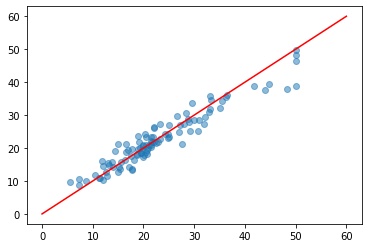

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(y_valid, pred, alpha = 0.5)
plt.plot(np.linspace(0, 60, 100), np.linspace(0, 60, 100), "red")
plt.show()

In [12]:
#平均二乗誤差の平方根
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_valid, pred)
rmse = np.sqrt(mse)
print(rmse)

2.979917958387328


In [13]:
#学習の可視化
results_dict = {}
model = xgb.train(
    params = params,
    dtrain = dtrain,
    evals = [(dtrain, "train"), (dvalid, "valid")],
    num_boost_round = 100,
    evals_result = results_dict
)

[0]	train-rmse:16.9639	valid-rmse:17.7267
[1]	train-rmse:12.2371	valid-rmse:12.8148
[2]	train-rmse:8.92077	valid-rmse:9.48638
[3]	train-rmse:6.58932	valid-rmse:7.25608
[4]	train-rmse:4.93329	valid-rmse:5.82809
[5]	train-rmse:3.77386	valid-rmse:4.73814
[6]	train-rmse:2.96782	valid-rmse:4.12599
[7]	train-rmse:2.39062	valid-rmse:3.668
[8]	train-rmse:1.98896	valid-rmse:3.43602
[9]	train-rmse:1.7032	valid-rmse:3.26636
[10]	train-rmse:1.49486	valid-rmse:3.1739
[11]	train-rmse:1.35599	valid-rmse:3.11248
[12]	train-rmse:1.23939	valid-rmse:3.07794
[13]	train-rmse:1.17187	valid-rmse:3.05689
[14]	train-rmse:1.11787	valid-rmse:3.03585
[15]	train-rmse:1.06903	valid-rmse:3.00703
[16]	train-rmse:1.02203	valid-rmse:3.01016
[17]	train-rmse:0.956745	valid-rmse:2.99286
[18]	train-rmse:0.895796	valid-rmse:2.98393
[19]	train-rmse:0.831305	valid-rmse:2.97763
[20]	train-rmse:0.801838	valid-rmse:2.97487
[21]	train-rmse:0.738663	valid-rmse:2.98086
[22]	train-rmse:0.71553	valid-rmse:2.97854
[23]	train-rmse:0.68

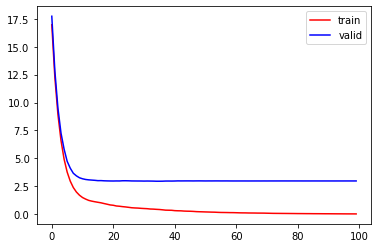

In [14]:
plt.plot(results_dict["train"]["rmse"], color = "red", label = "train")
plt.plot(results_dict["valid"]["rmse"], color = "blue", label = "valid")
plt.legend()
plt.show()

In [15]:
#後半の無駄な学習時間を除く（early_stopping_rounds：評価データがその回数分変わらないときに学習を終了する）
results_dict = {}
model = xgb.train(
    params = params,
    dtrain = dtrain,
    evals = [(dtrain, "train"), (dvalid, "valid")],
    num_boost_round = 100,
    early_stopping_rounds = 10,
    evals_result = results_dict
)

[0]	train-rmse:16.9639	valid-rmse:17.7267
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[1]	train-rmse:12.2371	valid-rmse:12.8148
[2]	train-rmse:8.92077	valid-rmse:9.48638
[3]	train-rmse:6.58932	valid-rmse:7.25608
[4]	train-rmse:4.93329	valid-rmse:5.82809
[5]	train-rmse:3.77386	valid-rmse:4.73814
[6]	train-rmse:2.96782	valid-rmse:4.12599
[7]	train-rmse:2.39062	valid-rmse:3.668
[8]	train-rmse:1.98896	valid-rmse:3.43602
[9]	train-rmse:1.7032	valid-rmse:3.26636
[10]	train-rmse:1.49486	valid-rmse:3.1739
[11]	train-rmse:1.35599	valid-rmse:3.11248
[12]	train-rmse:1.23939	valid-rmse:3.07794
[13]	train-rmse:1.17187	valid-rmse:3.05689
[14]	train-rmse:1.11787	valid-rmse:3.03585
[15]	train-rmse:1.06903	valid-rmse:3.00703
[16]	train-rmse:1.02203	valid-rmse:3.01016
[17]	train-rmse:0.956745	valid-rmse:2.99286
[18]	train-rmse:0.895796	valid-rmse:2.98393
[19]	train-rmse:0.831305	valid-rmse:2.97763
[20]	t

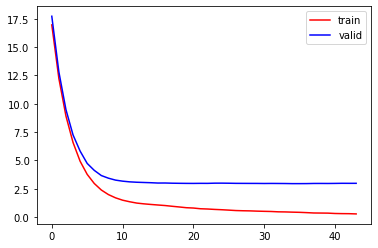

In [16]:
plt.plot(results_dict["train"]["rmse"], color = "red", label = "train")
plt.plot(results_dict["valid"]["rmse"], color = "blue", label = "valid")
plt.legend()
plt.show()
#学習回数が40回程度で止まった

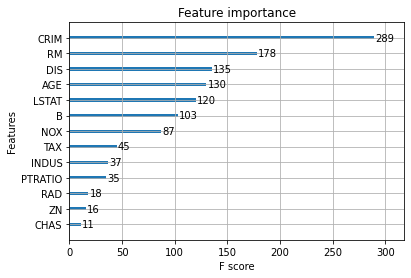

In [17]:
#特徴量重要度
xgb.plot_importance(model)
plt.show()

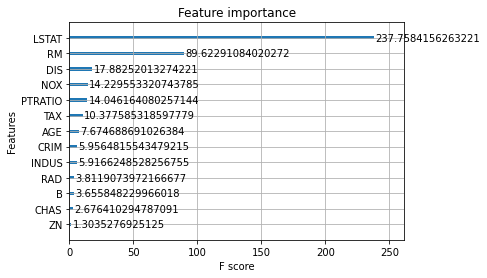

In [18]:
#"grain"に対する寄与率
xgb.plot_importance(model, importance_type = "gain")
plt.show()

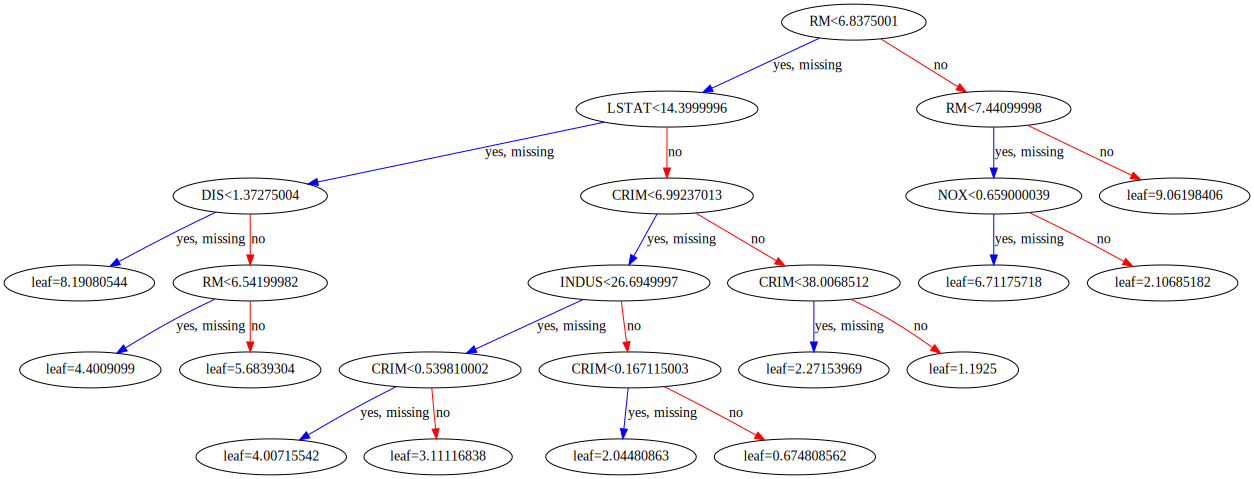

In [19]:
#決定木グラフィック
xgb.to_graphviz(model, num_trees=1)